In [1]:
import pandas as pd

# Charger le dataset Telco Churn
df = pd.read_csv("C:/Users/PC/Documents/projet_churn_teleco/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Aperçu des données
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Taille du dataset
df.shape

(7043, 21)

In [3]:
# Types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Valeurs uniques de la cible
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
# Nettoyage de la colonne 'TotalCharges'
# Convertir en numérique + détecter valeurs manquantes
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [7]:
# Supprimer les lignes incomplètes
df.dropna(inplace=True)
df.shape

(7032, 21)

In [9]:
# statistiques generale
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [11]:
#Afficher les colonnes object + leurs valeurs uniques :
for col in df.select_dtypes(include='object'):
    print(f"{col} → {df[col].unique()}")

customerID → ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender → ['Female' 'Male']
Partner → ['Yes' 'No']
Dependents → ['No' 'Yes']
PhoneService → ['No' 'Yes']
MultipleLines → ['No phone service' 'No' 'Yes']
InternetService → ['DSL' 'Fiber optic' 'No']
OnlineSecurity → ['No' 'Yes' 'No internet service']
OnlineBackup → ['Yes' 'No' 'No internet service']
DeviceProtection → ['No' 'Yes' 'No internet service']
TechSupport → ['No' 'Yes' 'No internet service']
StreamingTV → ['No' 'Yes' 'No internet service']
StreamingMovies → ['No' 'Yes' 'No internet service']
Contract → ['Month-to-month' 'One year' 'Two year']
PaperlessBilling → ['Yes' 'No']
PaymentMethod → ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn → ['No' 'Yes']


In [13]:
df_simplified = df.copy()

cols_to_clean = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_clean:
    df_simplified[col] = df_simplified[col].replace('No internet service', 'No')

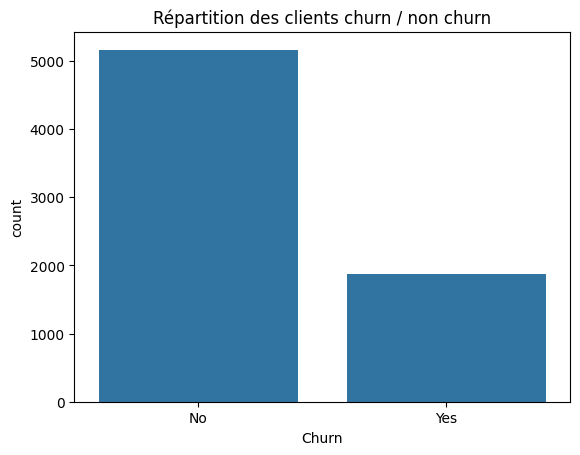

In [16]:
#Visualisation :
import matplotlib.pyplot as plt
import seaborn as sns

# Répartition du churn
sns.countplot(x='Churn', data=df)
plt.title("Répartition des clients churn / non churn")
plt.show()

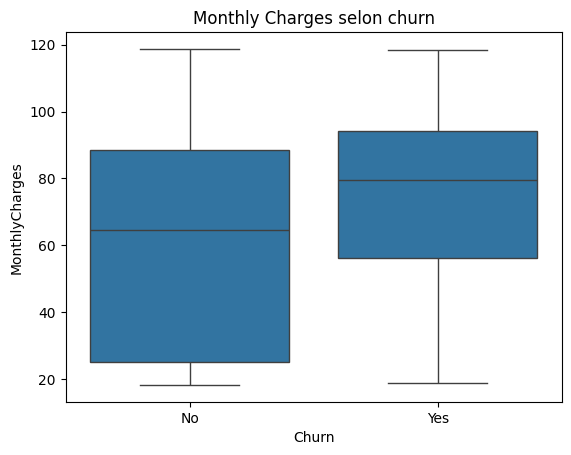

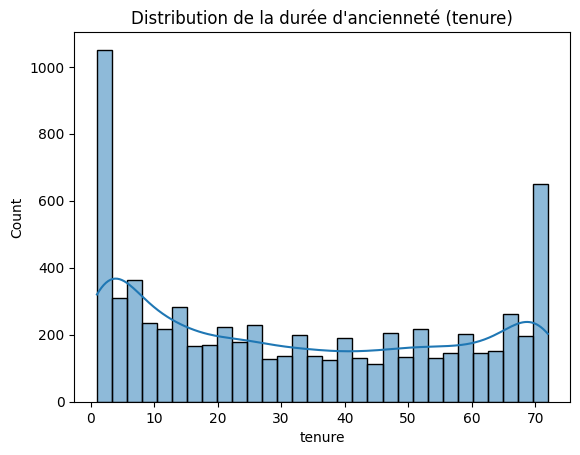

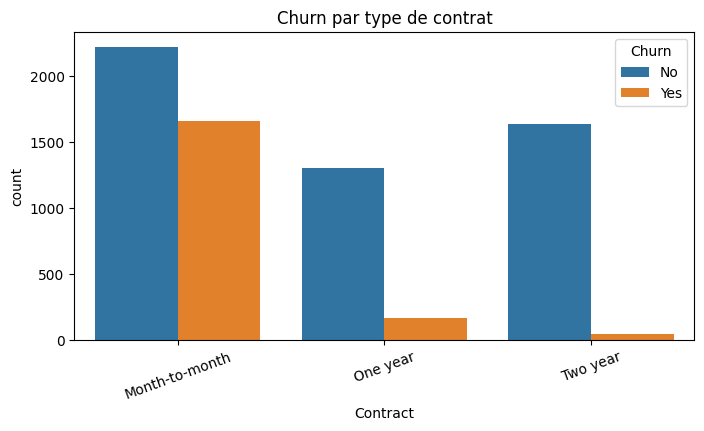

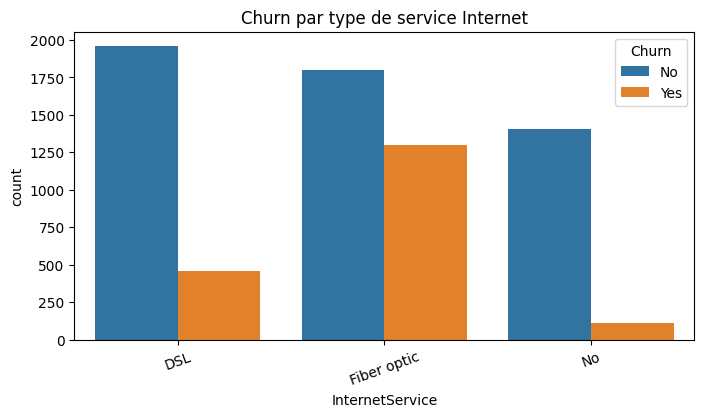

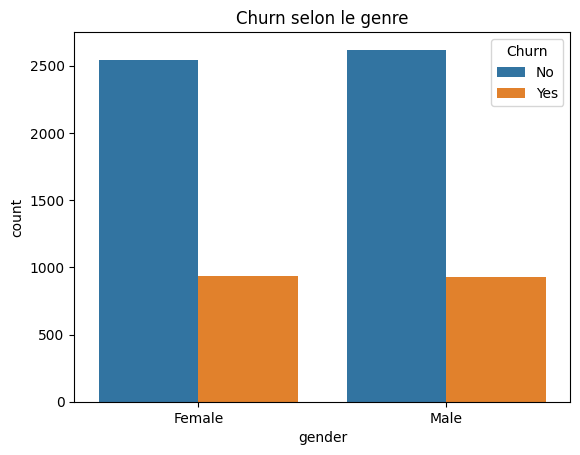

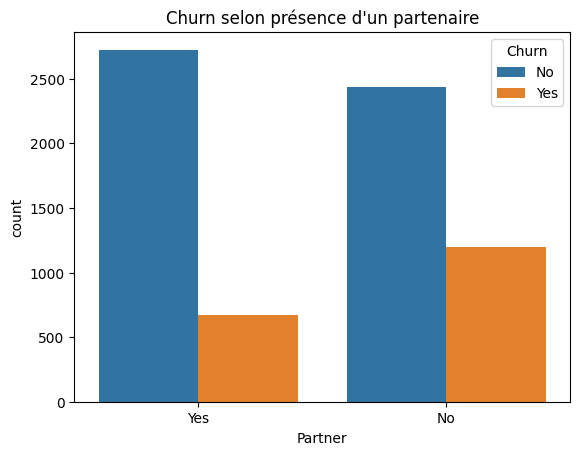

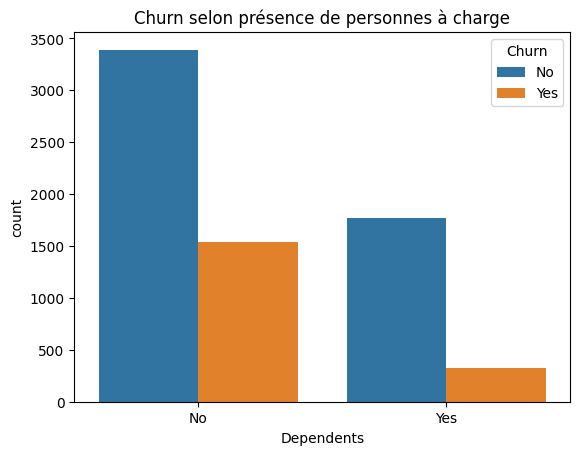

In [17]:
# Monthly Charges selon churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges selon churn")
plt.show()

# Tenure distribution
sns.histplot(data=df, x='tenure', kde=True, bins=30)
plt.title("Distribution de la durée d'ancienneté (tenure)")
plt.show()

# Churn par type de contrat
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn par type de contrat")
plt.xticks(rotation=20)
plt.show()

# Churn par type de service Internet
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn par type de service Internet")
plt.xticks(rotation=20)
plt.show()

# Churn par genre
sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Churn selon le genre")
plt.show()

# Churn selon présence d'un partenaire
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title("Churn selon présence d'un partenaire")
plt.show()

# Churn selon présence de dépendants
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title("Churn selon présence de personnes à charge")
plt.show()

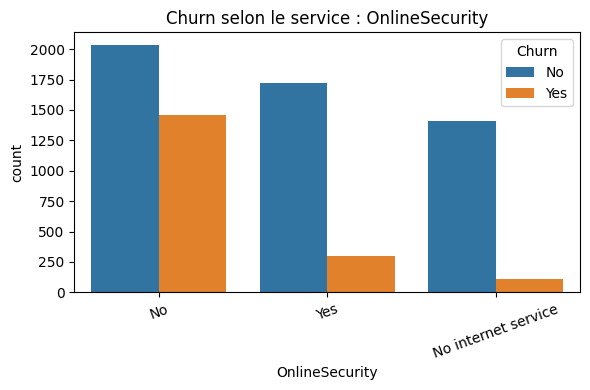

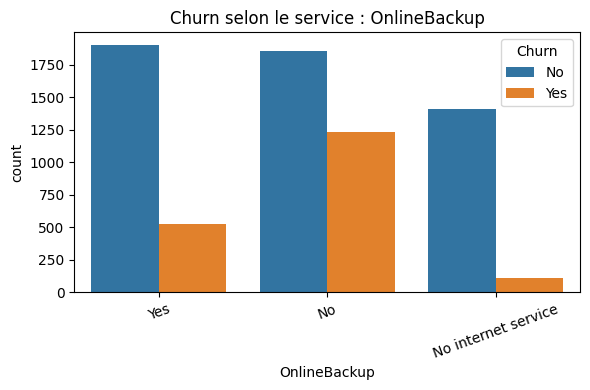

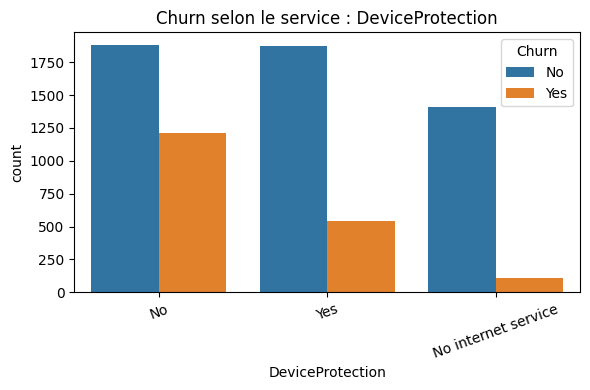

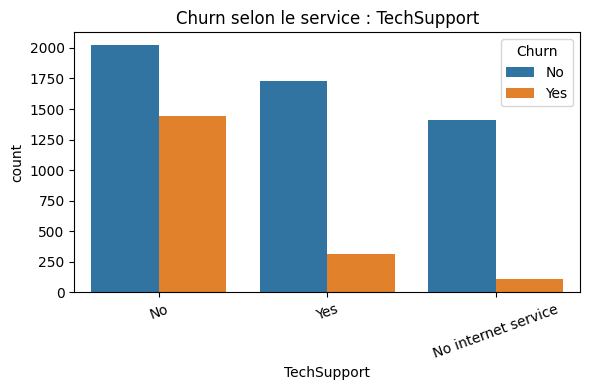

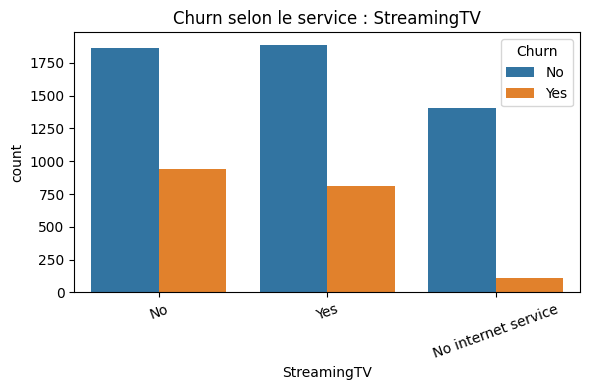

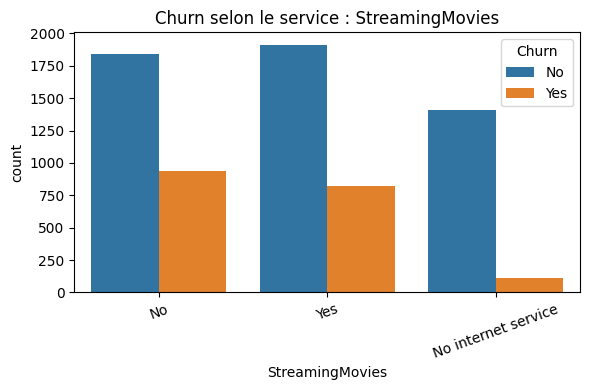

In [18]:
# Services liés à Internet : churn selon souscription

services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for service in services:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=service, hue='Churn')
    plt.title(f"Churn selon le service : {service}")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

In [19]:
#Préparation des données pour le modèle
# Suppression de la colonne customerID
df.drop(columns=['customerID'], inplace=True)

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
#Encodage des variables catégorielles
# Afficher les colonnes non numériques
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [22]:
#Conversion des colonnes Yes/No en 0/1
binary_cols = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling', 'Churn'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [23]:
# Pour gender (Male, Female)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})



In [24]:
df[binary_cols + ['gender']].head()


,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender
0,NaN,1,0,0,1,0,NaN
1,NaN,0,0,1,0,0,NaN
2,NaN,0,0,1,1,1,NaN
3,NaN,0,0,0,0,0,NaN
4,NaN,0,0,1,1,1,NaN


In [25]:
# rechargement de la colone gender de la source
df['gender'] = pd.read_csv("C:/Users/PC/Documents/projet_churn_teleco/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")['gender']


In [26]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})



In [27]:
df['gender'].value_counts(dropna=False)


gender
1    3549
0    3483
Name: count, dtype: int64

In [28]:
#One-Hot Encoding des variables catégorielles à + de 2 modalités
#lister le reste des colonnes à encoder
df.select_dtypes(include='object').columns.tolist()


['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [29]:
df = pd.get_dummies(df, drop_first=True)


In [30]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


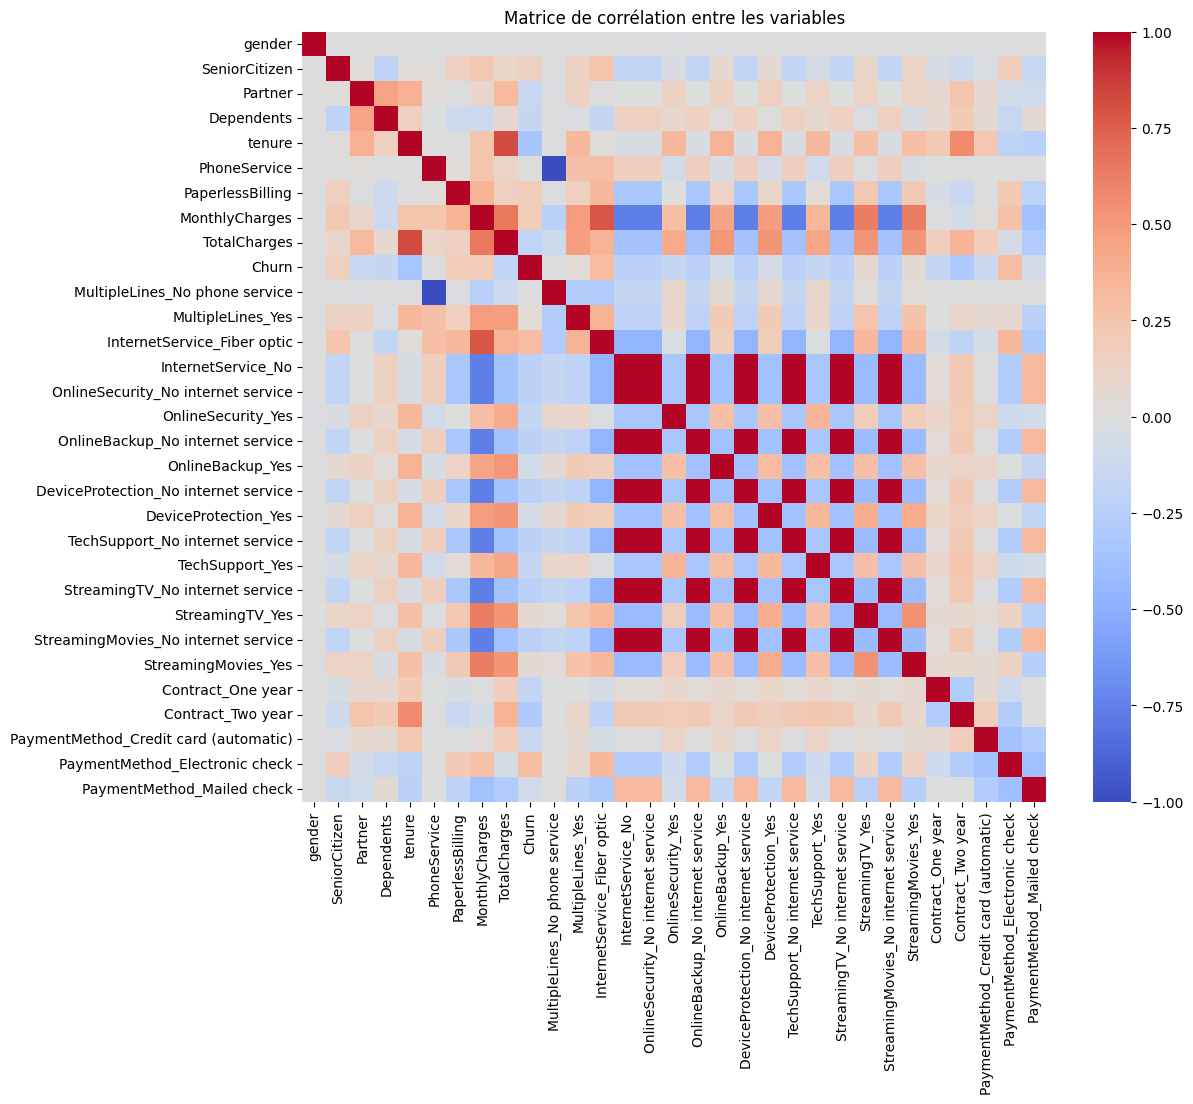

In [31]:
# Matrice de correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation entre les variables")
plt.show()

In [32]:
#Correlation avec churn uniquement
correlation_churn = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print(correlation_churn)


Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270
